In [235]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df = pd.DataFrame(merged_df)
# Display the data table for preview

merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [236]:
# Checking the number of mice.

number_of_mice = merged_df["Mouse ID"].nunique()
print(number_of_mice)



249


In [237]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = merged_df[merged_df.duplicated()]

duplicate_mouse = pd.DataFrame(duplicate_mouse["Mouse ID"])

duplicate_mouse

,Mouse ID
909,g989


In [238]:
#checking to see how many instances of dupes there are = 5

dupe_mouse_df = merged_df.set_index("Mouse ID")

dupe_mouse_df.loc["g989", "Timepoint"]

Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64

In [239]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [240]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Can see the row count has now dropped from 1893 to 1888 (5 values dropped)

merged_df_duplicates = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

clean_merged_df = pd.DataFrame(merged_df_duplicates)

clean_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [241]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = clean_merged_df["Mouse ID"].nunique()
print(number_of_mice)

249


## Summary Statistics

In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

regimen_median = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimen_var = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

regimen_std = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

regimen_sem = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_summary = pd.DataFrame({"Mean (Tumor Volume (mm3))": regimen_mean,
                               "Median (Tumor Volume (mm3))": regimen_median,
                               "Variance (Tumor Volume (mm3))": regimen_var,
                               "Standard Deviation (Tumor Volume (mm3))": regimen_std,
                               "SEM (Tumor Volume (mm3))": regimen_sem})

regimen_summary


,Mean (Tumor Volume (mm3)),Median (Tumor Volume (mm3)),Variance (Tumor Volume (mm3)),Standard Deviation (Tumor Volume (mm3)),SEM (Tumor Volume (mm3))
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

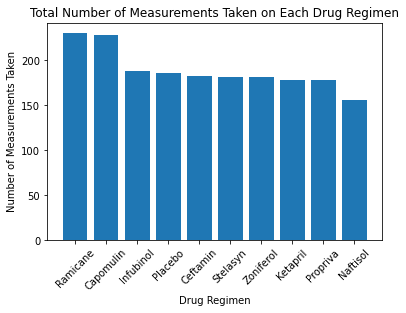

In [243]:
# Generate a bar plot showing the total number of measurements taken on each drug 
# regimen using pandas.


plot_data_1 = clean_merged_df["Drug Regimen"].unique()
plot_data_2 = clean_merged_df["Drug Regimen"].value_counts()

plt.bar(plot_data_1, plot_data_2)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.show()





In [298]:
%matplotlib notebook

In [299]:
# Generate a bar plot showing the total number of measurements 
#taken on each drug regimen using pyplot.

py_measurement = clean_merged_df["Drug Regimen"].value_counts().tolist()
each_regimen = clean_merged_df["Drug Regimen"].unique().tolist()

py_measurement

[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

<IPython.core.display.Javascript object>


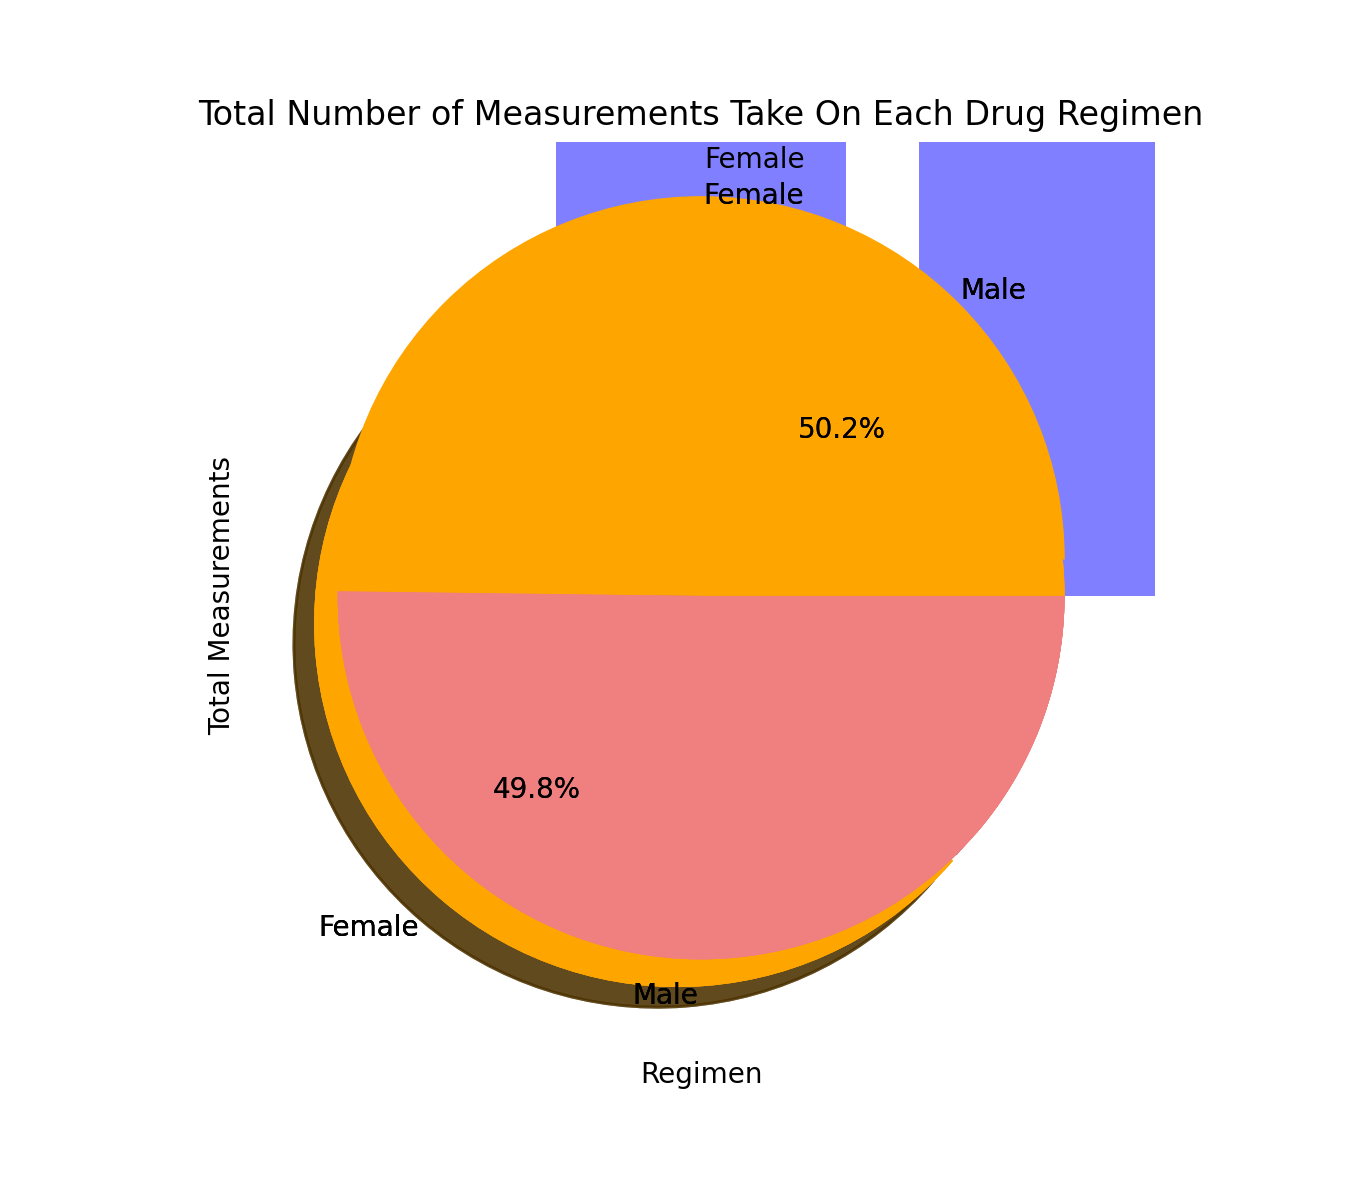

Text(0, 0.5, 'Total Measurements')

In [300]:
x_axis = np.arange(len(py_measurement))
plt.bar(x_axis, py_measurement, alpha=0.5, color='b')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, each_regimen, rotation=45)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(py_measurement)+10)

# Give the chart a title, x label, and y label
plt.title("Total Number of Measurements Take On Each Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Measurements")

In [352]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution = clean_merged_df.groupby("Sex")["Mouse ID"].nunique()

#gender_distribution = clean_merged_df.groupby("Sex")["Mouse ID"].nunique()
#gender_distribution

#gender_df = pd.DataFrame(gender_distribution)

gender_df = pd.DataFrame(gender_distribution)

female_percent = gender_df.iloc[0] / number_of_mice
male_percent = gender_df.iloc[1] / number_of_mice


# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [female_percent, male_percent]

# The colors of each section of the pie chart
colors = ["orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

gender_df = pd.DataFrame({"Percent of Female Mice": female_percent,
                         "Percent of Male Mice": male_percent})

female_percent

Mouse ID    0.497992
Name: Female, dtype: float64